In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# row = record
# column = attribute / dimension
# target column = prediction we need to make

In [48]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [32]:
cell_df.size

7689

In [33]:
cell_df.shape

(699, 11)

In [34]:
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [35]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

# Distribution of classes to visualise data
X-axis : Clump & Y-axis : UnifSize

In [36]:
malignant_df = cell_df[cell_df['Class']==4][0:200]  
#class value for malignant type is 4 and we want top 0:200 row elements only

In [37]:
benign_df = cell_df[cell_df['Class']==2][0:200]


In [38]:
help(benign_df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

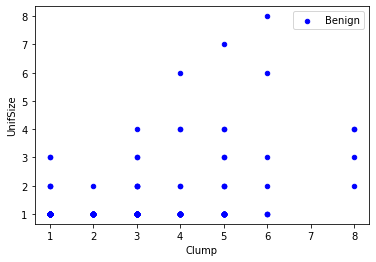

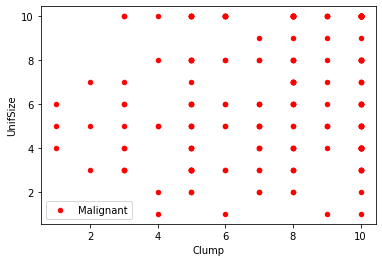

In [39]:
axes = benign_df.plot(kind = 'scatter' , x = 'Clump' , y ='UnifSize' , color = 'Blue' ,  label ='Benign')
malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize' , color = 'Red' , label = 'Malignant')

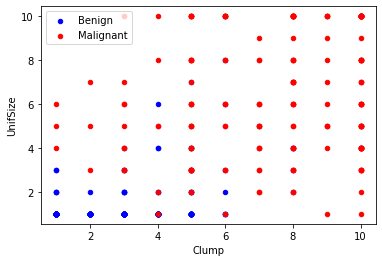

In [40]:
axes = benign_df.plot(kind = 'scatter' , x = 'Clump' , y ='UnifSize' , color = 'Blue' ,  label ='Benign')
malignant_df.plot(kind = 'scatter', x = 'Clump', y = 'UnifSize' , color = 'Red' , label = 'Malignant', ax = axes)

In [71]:
#identy unwanted rows
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [72]:
#object datatype  is non numeric so discard
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors ='coerce').notnull()]

In [73]:
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-73-facc873942a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [74]:
#to remove unwanted columns
cell_df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [75]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#independent var
X = np.asarray(feature_df)

#dependent variable
y = np.asarray(cell_df['Class'])


In [76]:
X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [77]:
# Train(X,y) as X->2D array y->1D array
#Test(X,y)

In [80]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 4)
X_train.shape

(546, 9)

In [81]:
y_train.shape

(546,)

In [82]:
X_test.shape

(137, 9)

In [83]:
y_test.shape

(137,)

# Modeling (SVM WITH SKI KIT)

In [87]:
from sklearn import svm 
classifier = svm.SVC(kernel = 'linear' , gamma = 'auto' , C = 2)   #linear/polynomial/rbf/sigmoid
#gamma = kernel coefficient
classifier

SVC(C=2, gamma='auto', kernel='linear')

Gamma value : 'auto' which uses (1/n) features
              'scale'which uses 1/(n_features*X.var())

In [89]:
classifier.fit(X_train , y_train)


SVC(C=2, gamma='auto', kernel='linear')

In [90]:
y_predict = classifier.predict(X_test)

# EVALUATION

In [96]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [97]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_predict))

Accuracy:  0.9635036496350365


In [ ]:
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python